<a href="https://colab.research.google.com/github/irtiza1999/Data-Structure-Python/blob/main/Large_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [12]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [15]:
# one hot encoding for catagorical var into indicator var
insOneHot = pd.get_dummies(insurance)
insOneHot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [53]:
x = insOneHot.drop("charges", axis=1)
y = insOneHot["charges"]
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 42)

tf.random.set_seed(42)

insuranceModel = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

insuranceModel.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["mae"])

history = insuranceModel.fit(xTrain, yTrain, epochs=200,verbose=0)

In [54]:
insuranceModel.evaluate(xTest,yTest)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

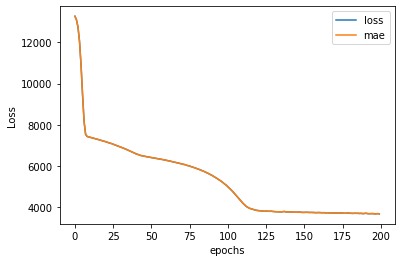

In [56]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

#Pre process data

In [64]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [108]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 42)

ct.fit(xTrain)

xTrainNorm = ct.transform(xTrain)
xTestNorm = ct.transform(xTest)


tf.random.set_seed(42)

insuranceModel_2 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
insuranceModel_2.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(lr=0.01),
                       metrics = ["mae"])

history2 = insuranceModel_2.fit(xTrainNorm, yTrain, epochs=5000,callbacks=[callback],verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [109]:
insuranceModel_2.evaluate(xTestNorm,yTest)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5942 - mae: 3170.5942


[3170.59423828125, 3170.59423828125]

Text(0.5, 0, 'epochs')

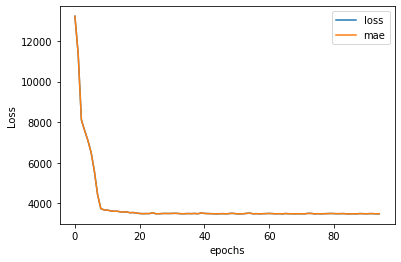

In [111]:
pd.DataFrame(history2.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

In [112]:
insuranceModel_2.save("Medical insurance dataset")

INFO:tensorflow:Assets written to: Medical insurance dataset/assets
